In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras import regularizers
from keras.callbacks import EarlyStopping,TensorBoard
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
from time import time
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Dataset which consists of Quantitative ultrasound parameters, Texture parameters with GLCM, Biopsy, and SNR, CNR, and out parameters for 100 patients.

### First 5 rows from dataset

In [3]:
data = pd.read_excel('C:/Users/sbadretale/Downloads/Lakshmnan/100LABCcompleted_QUSrim_W0_MP.xlsx')
data.head()

,Patient ID,Patient,MP,ER,PR,HER2,MBF(dBr),SS(dB/MHz),SI(dBr),SAS(mm),...,MBF_SNR,SS_SNR,SI_SNR,ASD_SNR,AAC_SNR,MBF_OUT,SS_OUT,SI_OUT,ASD_OUT,AAC_OUT
0,1,3,1,0,0,1,-2.778675,-4.068653,19.636174,1.029644,...,-0.810714,-2.971493,2.024284,5.067156,2.631518,-1.386757,-4.072922,21.051610,132.344836,34.792543
1,2,4,1,1,1,0,3.738867,-4.316819,27.520903,1.130771,...,0.162113,-3.475078,2.730974,4.753324,2.982394,6.418002,-4.022624,28.579270,136.370054,37.018748
2,3,5,0,1,1,1,-2.778675,-4.068653,19.636174,1.029644,...,-0.810714,-2.971493,2.024284,5.067156,2.631518,-1.386757,-4.072922,21.051610,132.344836,34.792543
3,4,7,1,1,1,1,2.595402,-3.189765,20.168321,0.870080,...,0.142186,-1.720124,1.676310,2.396269,1.300076,5.494789,-3.442657,24.460930,119.130974,42.516350
4,5,8,1,1,1,0,3.652809,-3.693204,23.999249,1.086154,...,-0.230491,-3.512144,2.517038,4.542364,2.188439,5.946697,-3.428662,24.835738,122.434851,38.118511


### All the columns in the dataset

In [4]:
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['Patient ID', 'Patient', 'MP', 'ER', 'PR', 'HER2', 'MBF(dBr)',
       'SS(dB/MHz)', 'SI(dBr)', 'SAS(mm)', 'ACE(dB/cm-MHz)', 'ASD_gau(um)',
       'AAC_gau(dB/cm^3)', 'MBF con', 'MBF cor', 'MBF ene', 'MBF hom',
       'SS con', 'SS cor', 'SS ene', 'SS hom', 'SI con', 'SI cor', 'SI ene',
       'SI hom', 'SAS con', 'SAS cor', 'SAS ene', 'SAS hom', 'ASD_gau con',
       'ASD_gau cor', 'ASD_gau ene', 'ASD_gau hom', 'AAC_gau con',
       'AAC_gau cor', 'AAC_gau ene', 'AAC_gau hom', 'MBF_CNR', 'SS_CNR',
       'SI_CNR', 'ASD_CNR', 'AAC_CNR', 'MBF_SNR', 'SS_SNR', 'SI_SNR',
       'ASD_SNR', 'AAC_SNR', 'MBF_OUT', 'SS_OUT', 'SI_OUT', 'ASD_OUT',
       'AAC_OUT'],
      dtype='object')


In [5]:
y = data.MP                         # Responded or Non-responded
list = ['Patient','MP']
x = data.drop(list,axis = 1 )
#x.head()

### Visualization of first 25 parameters , orange means responded and blue means non-responed patients
### Since blue and oranges are among each other and there is no horizontal line capable of dividing two colors apart, feature selection is difficult.

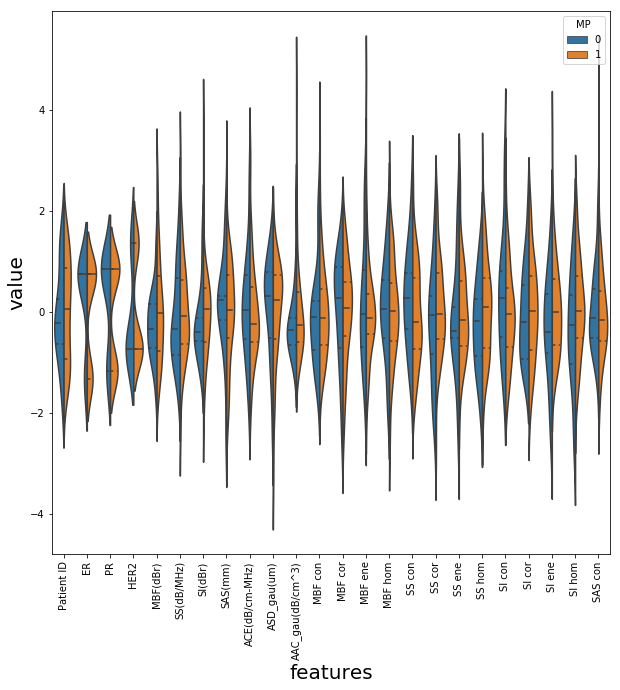

In [6]:
# to increase the width of cell
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std()) # standardization
#data_n_2=data
data = pd.concat([y,data_n_2.iloc[:,0:24]],axis=1)
data = pd.melt(data,id_vars="MP",
                    var_name="features",
                    value_name='value')
fig = plt.figure(figsize=(10,10))
b=sns.violinplot(x="features", y="value", hue="MP", data=data,split=True, inner="quart")
b.set_xlabel("features",fontsize=20)
b.set_ylabel("value",fontsize=20)
plt.xticks(rotation=90)
#sns.set(font_scale = 0.8)
#sns.set_style({'xtick.minor.size': 20.0})
#plt.ylim(-2, 2)
plt.show()
#sns.axes_style()

### Visualization of last 25 parameters
### Same as previous plot, there is no obvious horizontal line to separate colors

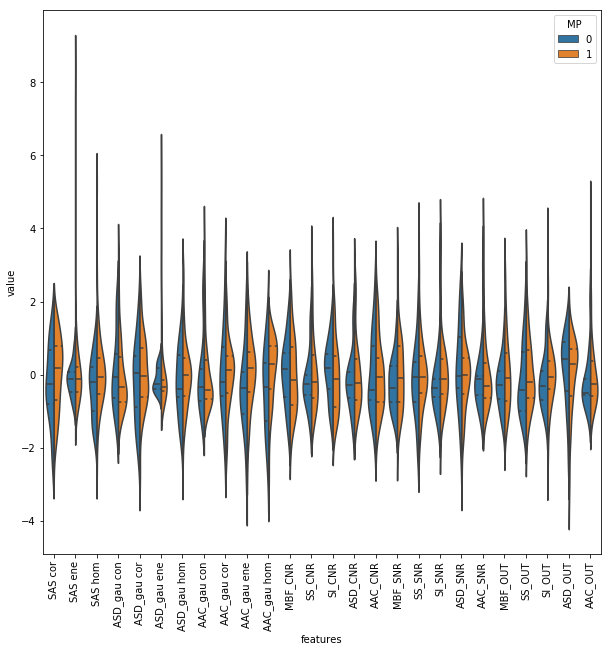

In [7]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,24:50]],axis=1)
data = pd.melt(data,id_vars="MP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="MP", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

### Similar visualization of first few parameters with swarmplot providing facts to same concept as previous plots.

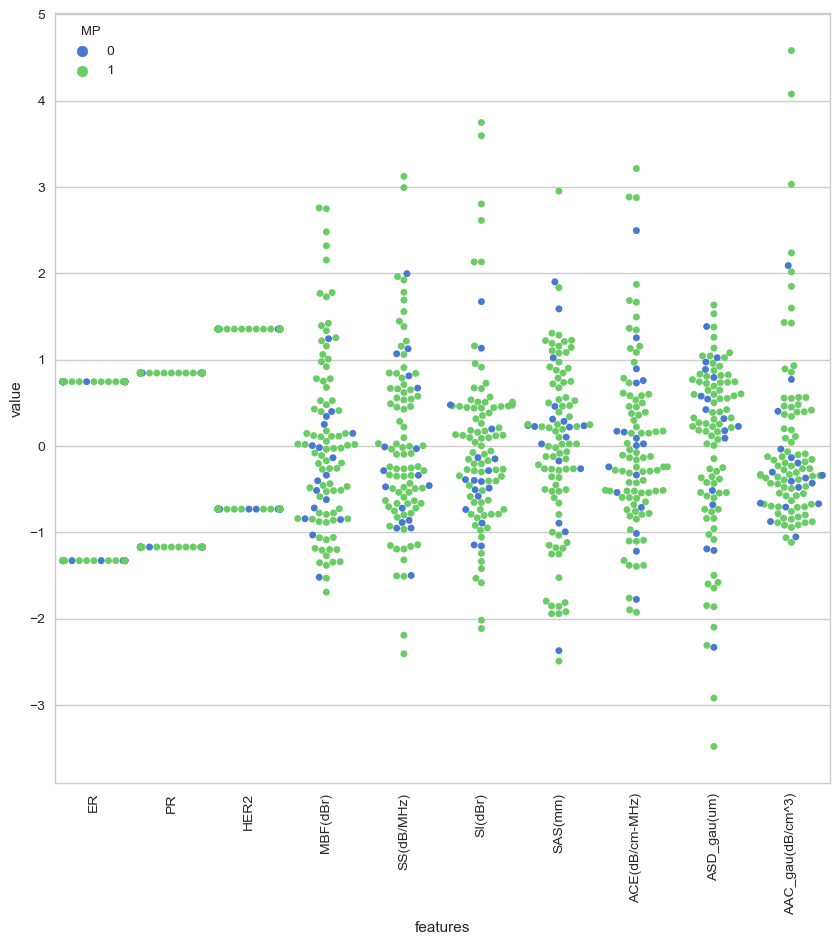

In [59]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="MP",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="MP", data=data)
plt.xticks(rotation=90)
plt.show()

## Feature selection and Dimensionality reduction 

### Quick overview of the dataset looking for possible high correlation among parameters for feature seleection 
### By using pearson correlation technique, some of the parameters have high correlations (above %90) .

In [31]:
import pandas_profiling
pandas_profiling.ProfileReport(x)

Number of variables,49
Number of observations,100
Total Missing (%),0.0%
Total size in memory,38.4 KiB
Average record size in memory,392.8 B
Numeric,40
Categorical,0
Date,0
Text (Unique),0
Rejected,9
Distinct count,94


### Applying detailed plot for correlation between 'AAC_OUT' and 'AAC_gau(dB/cm^3)' as an example and the correlation is almost %99 which means that one parameter can be linearly calculated from the other parameter by %99 accuracy.

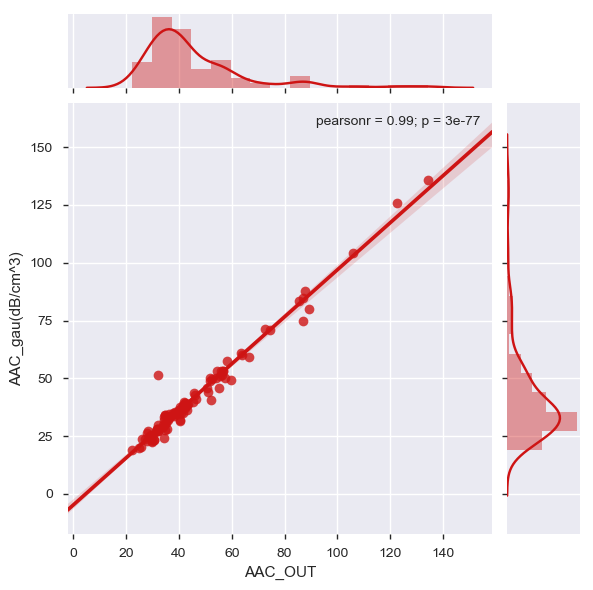

In [14]:
sns.jointplot(x.loc[:,'AAC_OUT'], x.loc[:,'AAC_gau(dB/cm^3)'], kind="regg", color="#ce1414")
plt.show()

### Compele correlation map for all the parameters in the dataset, if the result is near 1, there is a high correlation between parameters.

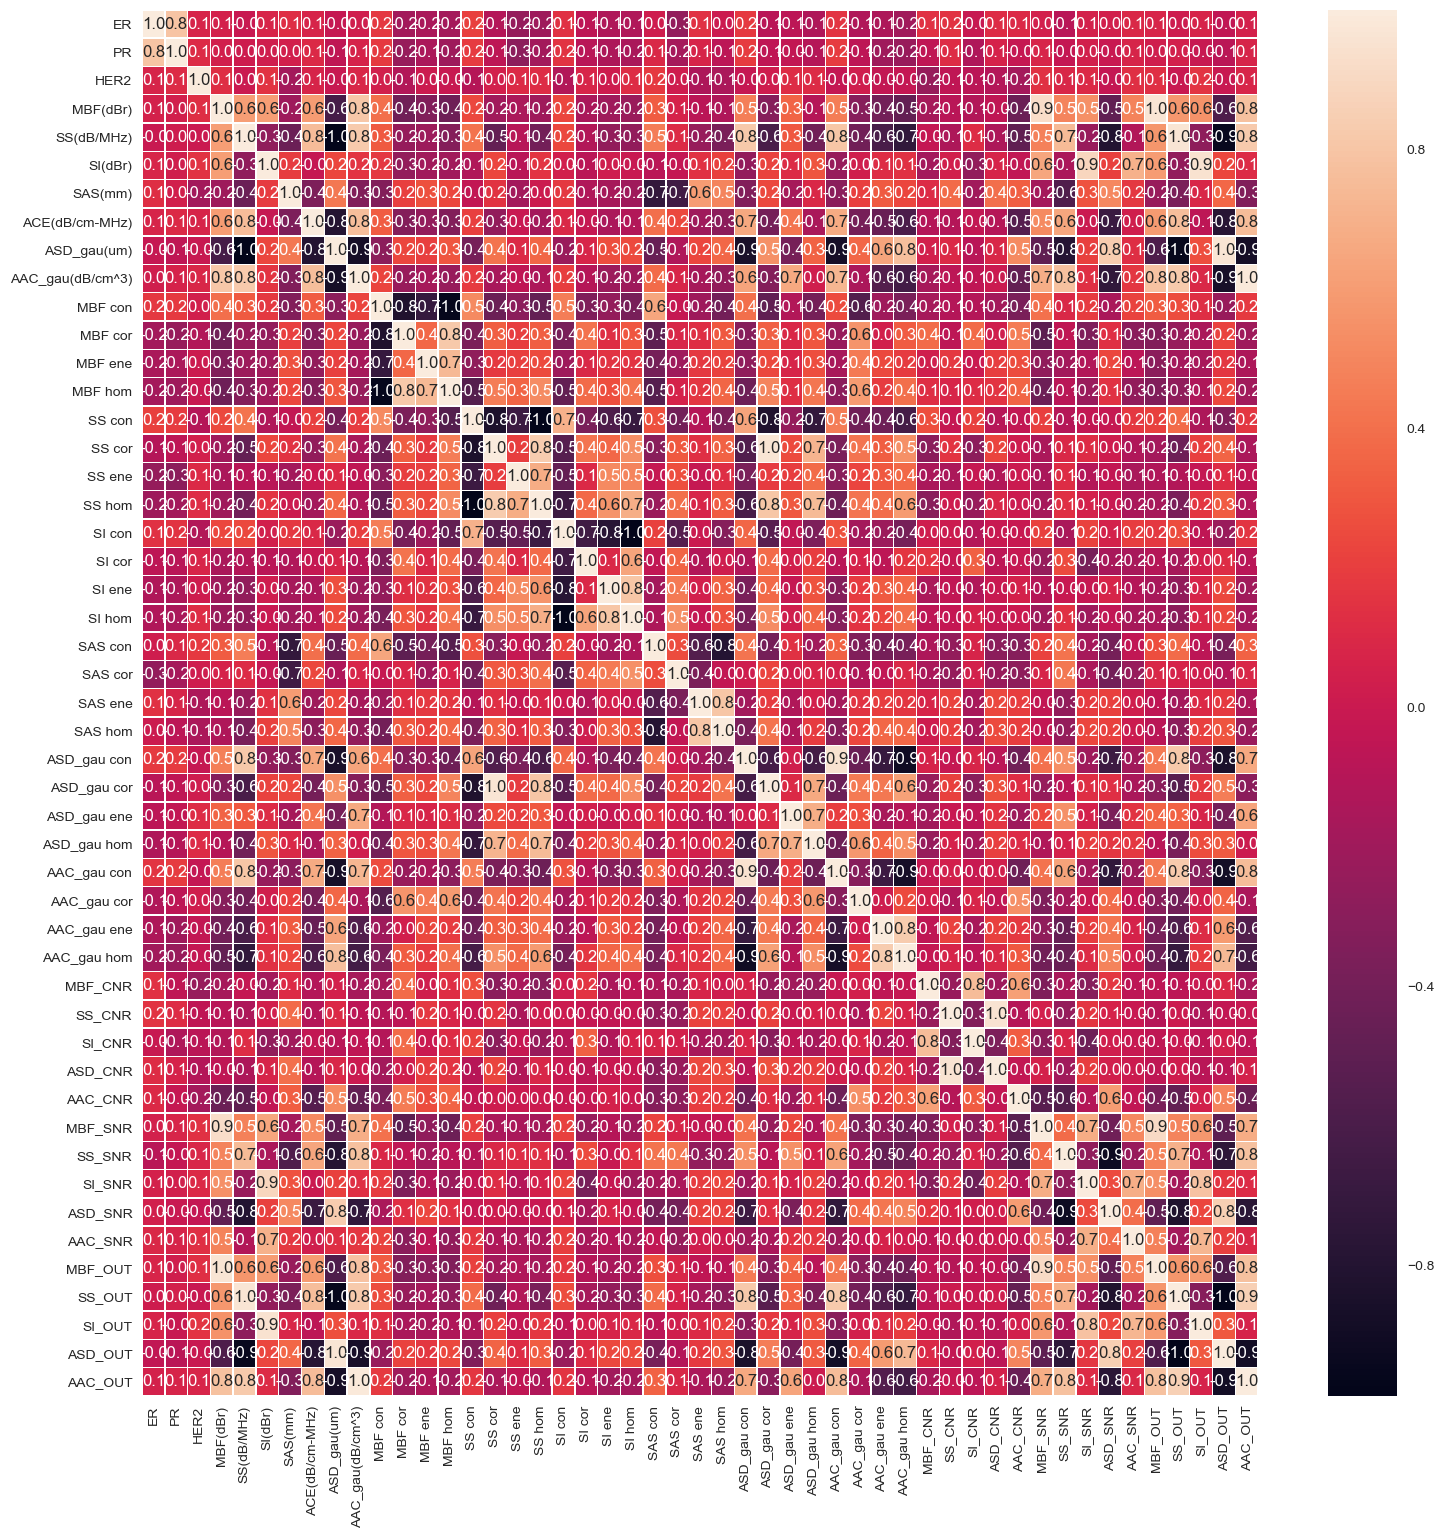

In [55]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.3, fmt= '.1f',ax=ax)
plt.show()

## Imbalanced data

### Checking the balance of the data and it shows data is imbalanced, number of responded patients are far more than non-responed patients.

Number of Responded:  83
Number of Non-responded :  17


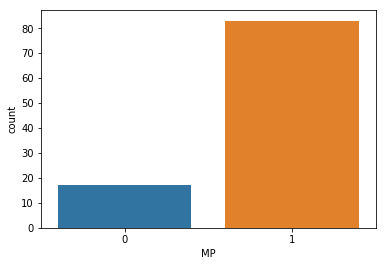

In [12]:
ax = sns.countplot(y,label="Count")       
R, NR = y.value_counts()
print('Number of Responded: ',R)
print('Number of Non-responded : ',NR)
fig = plt.figure(figsize=(12, 12))
#plt.savefig("figure.png", dpi=100)
plt.show()

### Using oversmapling method (Synthetic Minority Over-sampling Technique) to solve the imbalance issue

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Number of Responded:  83
Number of Non-responded :  83


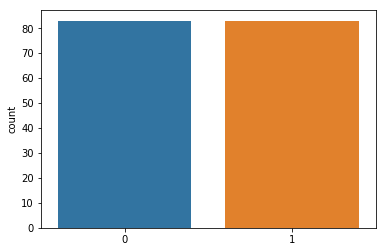

In [4]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_res, y_res = sm.fit_sample(x, y)

ax = sns.countplot(y_res,label="Count")       
R2, NR2 = pd.Series(y_res).value_counts()
print('Number of Responded: ',R2)
print('Number of Non-responded : ',NR2)
fig = plt.figure()
#plt.savefig("figure.png", dpi=100)
plt.show()

## I comapred two methods for feature reduction, first picking first 10 important parameters from 50 parameters from the dataset using Recursive feature elimination (RFE) technique resulted in accuray of %68

[False False False False False False False False False False  True False
 False False False  True  True False False False  True False False  True
 False False False False False False  True False False  True False False
 False False False False False False False False  True  True False False
  True]
Chosen best 10 feature by Recursive feature elimination (RFE): Index(['MBF con', 'SS cor', 'SS ene', 'SI ene', 'SAS cor', 'AAC_gau con',
       'AAC_gau hom', 'MBF_OUT', 'SS_OUT', 'AAC_OUT'],
      dtype='object')
Accuracy is:  0.68


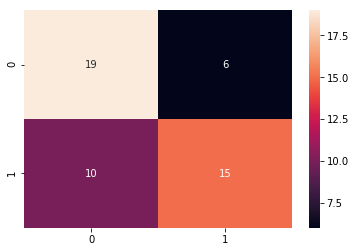

In [11]:
# Recursive feature elimination (RFE) with random forest on SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(X_res)

x_train, x_test, y_train, y_test = train_test_split(X, y_res, test_size=0.3, random_state=42)
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1,verbose=0)
rfe = rfe.fit(x,y)
print(rfe.support_)
print('Chosen best 10 feature by Recursive feature elimination (RFE):',x.columns[rfe.support_])
x_train_2 = rfe.transform(x_train)
x_test_2 = rfe.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
plt.show()

### Second method is using Pincipal compennt analysis method to combine highly correlated parameters and create 10 integrated parameters resulted in accuray of %78.

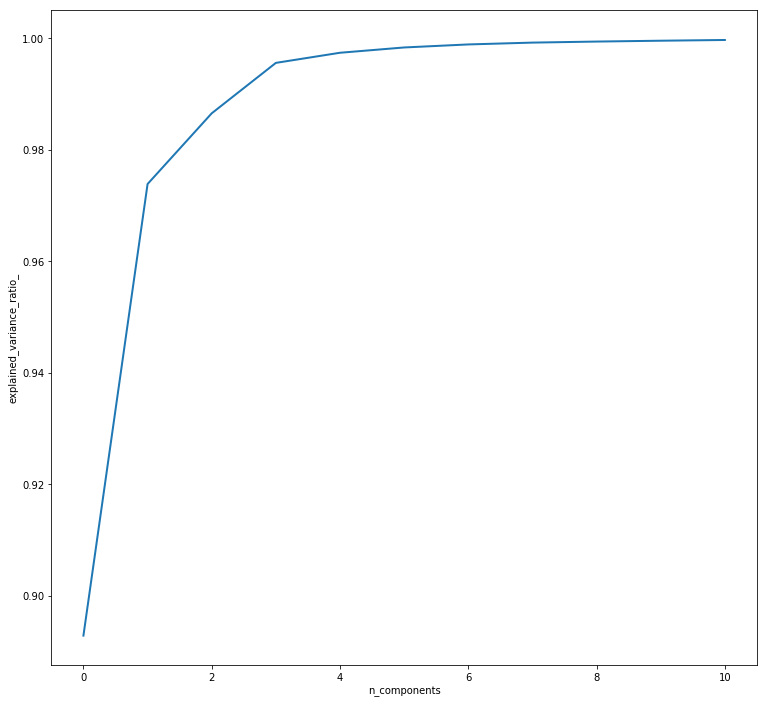

Accuracy is:  0.78


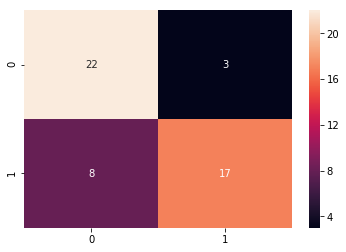

In [12]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(X_res)

X_res_N=pca.transform(X)

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X_res_N, y_res, test_size=0.3, random_state=42)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_.cumsum(), linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test))
sns.heatmap(cm_2,annot=True,fmt="d")
plt.show()

## Neural network 

### Last step is combining SMOTE to solving imbalance issue, PCA to reduce the parameters to 11, and appying Neural Network

In [32]:
data = pd.read_excel('C:/Users/sbadretale/Downloads/Lakshmnan/100LABCcompleted_QUSrim_W0_MP.xlsx')
y = data.MP                         # Responded or Non-responded
list = ['Patient','MP']
x = data.drop(list,axis = 1 )
scaler = MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(x)

sklearn_pca = PCA(n_components=11)
Y_sklearn = sklearn_pca.fit_transform(X)
X=Y_sklearn
print (sklearn_pca.explained_variance_ratio_.cumsum())

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, kind= 'svm',ratio = 1.0)
X_res, y_res = sm.fit_sample(X, y)
Y=y_res
X=X_res

[ 0.24852546  0.42501363  0.54583547  0.63690036  0.71385485  0.76884986
  0.82033985  0.85252306  0.87660854  0.89657835  0.91241187]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
from keras import optimizers
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
cvscores = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

### The proposed neural network has 5 dense layers, each layer is consisted of ReLU as an activation function. The last layer has sigmoid function for classification. I utlized dropout method in the first layer to avoid overfitting. The network has 1786 trainable parameters in total.

In [36]:
    # create model
    model = Sequential()
    model.add(Dense(31, input_dim=11))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    
    model.add(Dense(25))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.1))
    
    model.add(Dense(17))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(9))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    #model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 31)                372       
_________________________________________________________________
activation_1 (Activation)    (None, 31)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                800       
_________________________________________________________________
activation_2 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 17)                442       
_________________________________________________________________
activation_3 (Activation)    (None, 17)                0         
__________

### K-Fold cross validation is used to validate the model. In the end, the accuracy was almost %98 and the ROC curve was drawn. 

acc: 92.86%
acc: 92.86%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 92.86%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
97.86% (+/- 3.27%)


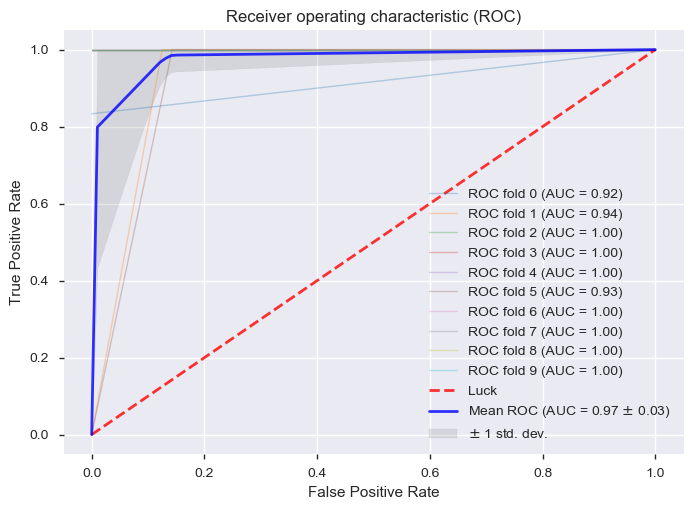

In [39]:
for train, test in kfold.split(X, Y):
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    # Fit the model
    history=model.fit(X[train], Y[train], epochs=750, batch_size=3, verbose=0)
    # evaluate the model
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], numpy.round(model.predict(X[test])))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
